In [13]:
import os
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

data_dir = "../data/kaggle-huge-stock-market-dataset"
etfs = os.path.join(data_dir, "ETFs")
stocks = os.path.join(data_dir, "Stocks")

In [12]:
len(os.listdir(etfs))
# print(list(map(lambda x: x.replace(".txt", ""), os.listdir(etfs))))

1344

In [6]:
spy = pd.read_csv(os.path.join(etfs, "spy.us.txt"))

In [7]:
spy.head()

,Date,Open,High,Low,Close,Volume,OpenInt
0,2005-02-25,104.77,106.00,104.68,105.79,70221808,0
1,2005-02-28,105.55,105.68,104.56,105.08,79695344,0
2,2005-03-01,105.22,105.87,105.22,105.62,54607412,0
3,2005-03-02,105.21,106.22,105.10,105.57,73733090,0
4,2005-03-03,105.99,106.20,105.15,105.61,71286823,0


In [9]:
spy["Date"] = pd.to_datetime(spy["Date"])

In [10]:
spy.dtypes

Date       datetime64[ns]
Open              float64
High              float64
Low               float64
Close             float64
Volume              int64
OpenInt             int64
dtype: object

In [11]:
spy.head()

,Date,Open,High,Low,Close,Volume,OpenInt
0,2005-02-25,104.77,106.00,104.68,105.79,70221808,0
1,2005-02-28,105.55,105.68,104.56,105.08,79695344,0
2,2005-03-01,105.22,105.87,105.22,105.62,54607412,0
3,2005-03-02,105.21,106.22,105.10,105.57,73733090,0
4,2005-03-03,105.99,106.20,105.15,105.61,71286823,0


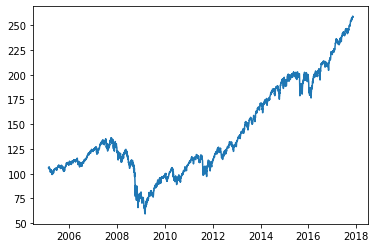

In [14]:
plt.plot(spy["Date"], spy["Close"])